# Quadratic Discriminant Analysis
After testing different values for each parameter, we identified the best configuration:
- `reg_param`: For optimal performance, the value should be as small as possible, ideally 0 or 1e-05.
- `priors`: The best results were recorded with prior distributions of [0.5, 0.5] or [0.4, 0.6].
- `store_covariance`: (True / False) Does not impact the result.

## Results
After testing various parameters combinations, the QuadraticDiscriminantAnalysis model achieved a maximum accuracy of `0.776`, which is inferior to other models. Therefore, we will stop here with the optimizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
# load data
data = pd.read_csv("../data/train_data.csv")
data_labels = pd.read_csv("../data/train_data_labels.csv")
test = pd.read_csv("../data/train_test.csv")
test_labels = pd.read_csv("../data/train_test_labels.csv")

print("Data shape:", data.shape)
print("Data labels shape:", data_labels.shape)
print("Test shape:", test.shape)
print("Test labels shape:", test_labels.shape)

Data shape: (784, 3)
Data labels shape: (784, 1)
Test shape: (107, 3)
Test labels shape: (107, 1)


In [3]:
# convert data to 1D arrays
data_labels = data_labels.values.ravel()
test_labels = test_labels.values.ravel()

In [4]:
reg_param_range = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
tol_range = [0.00001, 0.0001, 0.001]

results = []

for reg_param in reg_param_range:
    results.append(0)
    for tol in tol_range:
        clf = QuadraticDiscriminantAnalysis(tol=tol, reg_param=reg_param)
        clf.fit(data, data_labels)
        test_predictions = clf.predict(test)
        acc = accuracy_score(test_labels, test_predictions)
        results.append(acc)
    results.append(0)

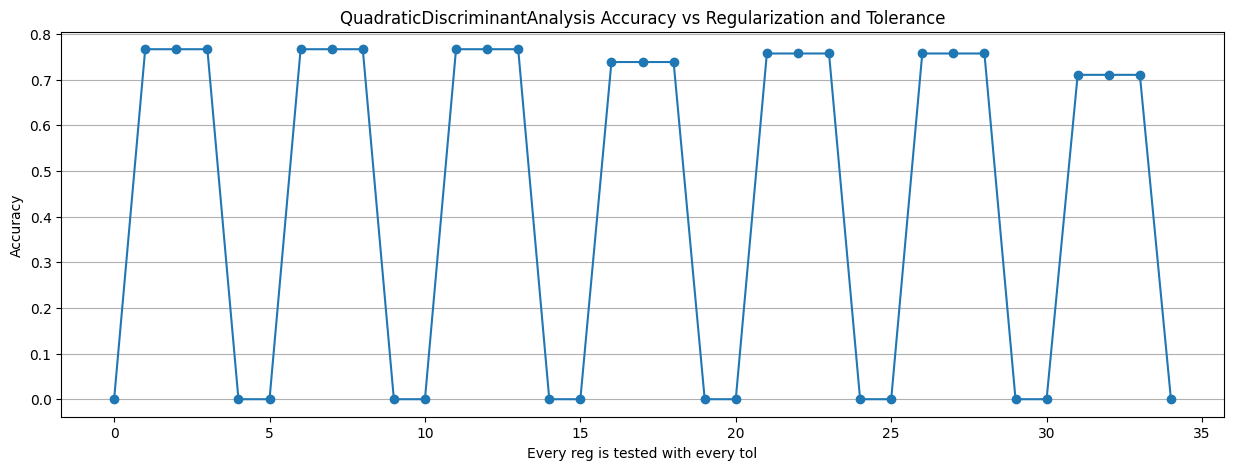

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(results, marker='o')
plt.title('QuadraticDiscriminantAnalysis Accuracy vs Regularization and Tolerance')
plt.xlabel('Every reg is tested with every tol')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.savefig('../results/QDA_reg_and_tol.png')
plt.show()

In [6]:
priors_range = [None, [0.5, 0.5], [0.6, 0.4], [0.4, 0.6]]
reg_param_range = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
tol_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

results_false = []
results_true = []
max_accuracy = 0

for priors in priors_range:
    results_false.append([])
    results_true.append([])
    for reg_param in reg_param_range:
        results_false[-1].append([])
        results_true[-1].append([])
        for i, tol in enumerate(tol_range):
            clf = QuadraticDiscriminantAnalysis(tol=tol, reg_param=reg_param, store_covariance=False, priors=priors)
            clf2 = QuadraticDiscriminantAnalysis(tol=tol, reg_param=reg_param, store_covariance=True, priors=priors)
            clf.fit(data, data_labels)
            clf2.fit(data, data_labels)
            test_predictions = clf.predict(test)
            test_predictions2 = clf2.predict(test)
            acc = accuracy_score(test_labels, test_predictions)
            acc2 = accuracy_score(test_labels, test_predictions2)
            print(f"Accuracy: {acc:.3f}/{acc2:.3f}, Reg param: {reg_param}, Tol: {tol}, Priors: {priors}, Store Covariance: False/True")

            results_false[-1][-1].append(acc)
            results_true[-1][-1].append(acc2)
            max_accuracy = max(max_accuracy, float(acc))

Accuracy: 0.766/0.766, Reg param: 0, Tol: 1e-05, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 0, Tol: 0.0001, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 0, Tol: 0.001, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 0, Tol: 0.01, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 0, Tol: 0.1, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 0, Tol: 1, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 1e-05, Tol: 1e-05, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 1e-05, Tol: 0.0001, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 1e-05, Tol: 0.001, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 1e-05, Tol: 0.01, Priors: None, Store Covariance: False/True
Accuracy: 0.766/0.766, Reg param: 1e-05, Tol: 0.1, Priors: None, Store

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The cova

Accuracy: 0.757/0.757, Reg param: 0.01, Tol: 0.0001, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.01, Tol: 0.001, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.01, Tol: 0.01, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.01, Tol: 0.1, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.01, Tol: 1, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.1, Tol: 1e-05, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.1, Tol: 0.0001, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.1, Tol: 0.001, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.1, Tol: 0.01, Priors: [0.6, 0.4], Store Covariance: False/True
Accuracy: 0.757/0.757, Reg param: 0.1, Tol: 0.1, Priors: [0.6, 0.4], Store Covariance: False/True
Acc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The cova

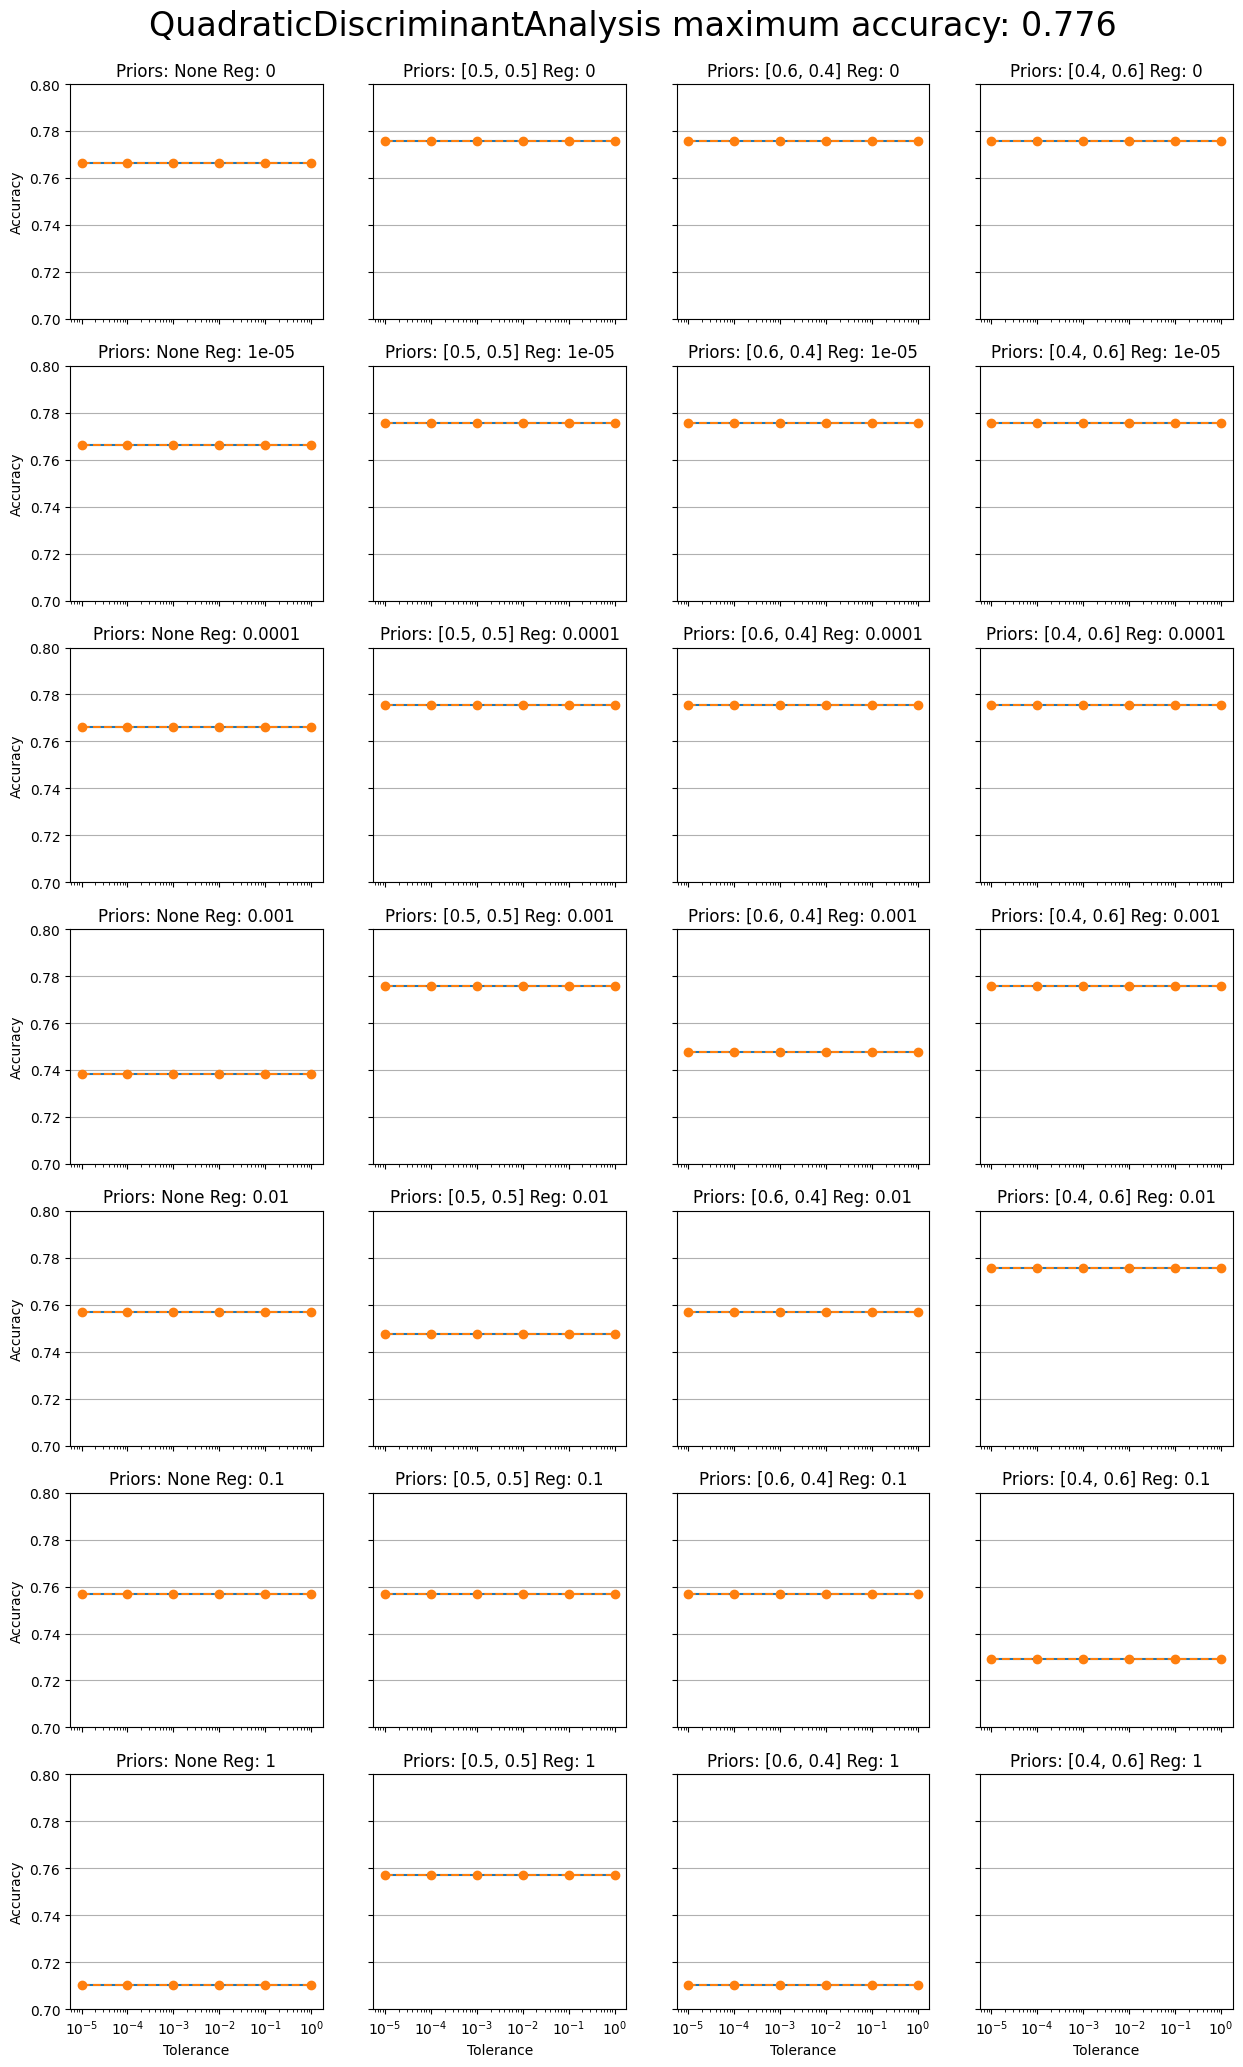

In [7]:
fig, axis = plt.subplots(len(reg_param_range), len(priors_range), figsize=(15, 25))
fig.suptitle(f'QuadraticDiscriminantAnalysis maximum accuracy: {max_accuracy:.3f}', fontsize=24, y=0.91)
for i, priors in enumerate(priors_range):
    for j, reg_param in enumerate(reg_param_range):
        axis[j, i].plot(tol_range, results_false[i][j])
        axis[j, i].plot(tol_range, results_true[i][j], linestyle='--', marker='o')
        axis[j, i].set_title(f'Priors: {priors} Reg: {reg_param}')
        axis[j, i].set_xscale('log')
        if i == 0:
            axis[j, i].set_ylabel('Accuracy')
        else:
            axis[j, i].set_yticklabels([])
        if j == len(reg_param_range) - 1:
            axis[j, i].set_xlabel('Tolerance')
        else:
            axis[j, i].set_xticklabels([])
        axis[j, i].grid(axis='y')
        axis[j, i].set_ylim(0.7, 0.8)
fig.savefig('../results/QDA_priors_reg_tol.png')